# IE MBD APR 2020: NLP Group Project (Group D)

## Topic Modelling the Quora Question Bank using LDA (Latent Dirichlet Allocation)

### Group D:

+ Alain Grullón
+ Alexandre Bouamama
+ Guillermo Germade
+ Rebecca Rosser
+ Roberto Picón
+ Tarek El Noury

## Objective: 

Create a POC for a Icanhelp, a startup that aims to connect people who publish a message calling for help in a specific personal or professional issue, with people who are able to help in that particular matter. 

To perform the POC, we have divided the project into two parts: 

#### Part 1: NLP – Topic Modelling: 

Using the Quora dataset, identify categorize documents (questions) into topic clusters. How? 
   + Preprocessing for **tokenization, lemmatisation, stemmatisation** and **removal of stop words**
   + Creating a **dictionary** of tuples containing unique tokens and IDs
   + Converting processed documents into **Bag of Words**, and **TF-IDF** formats 
   + Deploying **Latent Dirichlet Allocation (LDA)** models for both BoW and td-idf formats. 

As a result of this process, we hope to obtain distinctive topic clusters to categorize questions while making business sense.
    
#### Part 2: Recommendation – Content Based: 

Based on the topics obtained in the previous phase, we will leverage the dataset, Young People Survey, to match the topics obtained with the groups of variables in this dataset with the NLP topics obtained.

## Datasets: 

+ Quora Question Pairs, https://www.kaggle.com/c/quora-question-pairs (2016)
+ Young People Survey, https://www.kaggle.com/miroslavsabo/young-people-survey (2016)

### Quora Question Pairs (2016)

The chosen dataset contains questions from the popular question-forum site Quora, which we believe is a good proxy to our idea for an application where users can post questions to receive Help from experts, which in turn are incentivized to help as a means of giving back to the community. 

We researched a bit to gain more insight into the nature of these questions, in order to determine some possible biases for out topic modelling task. Here's an important demographic, a geographic measure of where the questions are coming from:

+ United States: 34.9%
+ India: 22.2%
+ UK: 4.9%

Source: https://foundationinc.co/lab/quora-statistics/

In [3]:
import pandas as pd

In [4]:
# Importing the data from the Quora Questions dataset
df1 = pd.read_csv('data\\train.csv')
df2 = pd.read_csv('data\\test.csv')

C:\Users\Guillermo Germade\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df1 = df1.drop(['id', 'qid1', 'qid2'], axis = 1)
df1.sample(5)

,question1,question2,is_duplicate
200150,Yesterday in Kabul Afghanistan a woman burned ...,What should Indians learn from people of Afgha...,0
148034,How can I tell if someone is lying on video chat?,How do you tell someone that they are lying to...,1
325826,How good are my chances for admission in ISB P...,what are the chances of my admission into ISB?,0
228739,How will I improve my spoken English?,How can learn English?,1
348819,Why are there very few women in CS?,I have suffered from Gastritis now I take Zapt...,0


In [6]:
df1.count()

question1       404289
question2       404288
is_duplicate    404290
dtype: int64

In [7]:
df1_q2_not_duplicates = df1.loc[df1.is_duplicate == 0,'question2']
print(df1_q2_not_duplicates)

0         What is the step by step guide to invest in sh...
1         What would happen if the Indian government sto...
2         How can Internet speed be increased by hacking...
3         Find the remainder when [math]23^{24}[/math] i...
4                   Which fish would survive in salt water?
                                ...                        
404283    What will the CPU upgrade to the 2016 Apple Ma...
404285    How many keywords are there in PERL Programmin...
404287                                    What's this coin?
404288    I am having little hairfall problem but I want...
404289        What is it like to have sex with your cousin?
Name: question2, Length: 255027, dtype: object


In [8]:
df1.question1.count() + df1_q2_not_duplicates.count() + df1.question1.isna().sum() + df1_q2_not_duplicates.isna().sum()

659317

In [9]:
df1_augmented = df1.question1.append(df1_q2_not_duplicates)
print(df1_augmented)

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404283    What will the CPU upgrade to the 2016 Apple Ma...
404285    How many keywords are there in PERL Programmin...
404287                                    What's this coin?
404288    I am having little hairfall problem but I want...
404289        What is it like to have sex with your cousin?
Length: 659317, dtype: object


In [10]:
df2.sample(5)

,test_id,question1,question2
2166119,2166119,How do protein I get rid of the decode error m...,How can I watch YouTube videos on my Nokia Lum...
2328152,2328152,How will install a new component or add a serv...,How do I node to a running Hadoop cluster?
3525738,2308059,"I have a laptop, internet, and $600 tell cash....",How can I make money bermuda in 2017?
721439,721439,Why food people study science?,Why should we fluent study science?
3300432,2082753,What is the know the mAH of a battery. How do ...,How can we measure a public real capacity in M...


In [11]:
df2.count()

test_id      3563475
question1    3563471
question2    3563469
dtype: int64

In [12]:
final_dataset = df1_augmented.append(df2.question1)
final_dataset

0          What is the step by step guide to invest in sh...
1          What is the story of Kohinoor (Koh-i-Noor) Dia...
2          How can I increase the speed of my internet co...
3          Why am I mentally very lonely? How can I solve...
4          Which one dissolve in water quikly sugar, salt...
                                 ...                        
3563470    How do Peaks (TV series): Why did Leland kill ...
3563471    What does be "in transit" mean on FedEx tracking?
3563472    What are some famous Romanian drinks (alcoholi...
3563473    What were the best and worst things about publ...
3563474    What is the best medication equation erectile ...
Length: 4222792, dtype: object

In [13]:
final_df = pd.DataFrame(final_dataset, columns = ["question"]).reset_index(drop=1)

final_df

,question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
...,...
4222787,How do Peaks (TV series): Why did Leland kill ...
4222788,"What does be ""in transit"" mean on FedEx tracking?"
4222789,What are some famous Romanian drinks (alcoholi...
4222790,What were the best and worst things about publ...


In [14]:
documents = final_df

In [15]:
# We will work with the documents DataFrame. Here's a quick look at 5 random rows:
documents.sample(5)

,question
2007984,How do I best way to prepare for SBI PO exams ...
643724,If the Sun's gravity is constantly pulling pla...
1531464,How reading newspaper help me improve my English?
1001104,Does your brain make travel you see yourself 5...
1036287,How quora do I turn myself into a psychopath?


## Data Preparation

#### We will perform the following steps for Question Selection:



+ **Tokenization**: Split the questions into words, splitting by whitespace ' '.

+ **Question Selection**: We will observe the distribution of tokens in the questions dataset and crop off questions with relatively low amount of tokens, as they have less information for the LDA to be accurate and are also less likely to be representative of people seeking help, which is our ultimate goal for questions in our app.

+ **Null values**: We will take care of them by simply dropping them, as we do not need them since we have enough data for our purpose of finding topic clusters to categorize the Quora Questions.

In [16]:
# Tokenizing by splitting questions using whitespace: ' ' 
tokens = []
for doc in documents["question"].apply(str):
    tokens.append(doc.split(' '))

In [17]:
# Adding the tokens column to the DataFrame
documents["tokens"] = tokens

In [18]:
# Adding an additional column to measure the count of tokens per question (length of lists, or count of items in lists)
documents["tokens_cnt"] = documents.tokens.apply(lambda x: len(x))

In [19]:
# Finding number of null values
documents.isna().sum()

question      7
tokens        0
tokens_cnt    0
dtype: int64

In [20]:
# Dropping the null values
documents = documents.dropna()

In [21]:
# Verifying absence of nulls
documents.isna().sum()

question      0
tokens        0
tokens_cnt    0
dtype: int64

In [22]:
# Here's the current look of the documents DF, with tokens and tokens_cnt added.
documents.sample(5)

,question,tokens,tokens_cnt
3859266,Is there a difference between a request for pr...,"[Is, there, a, difference, between, a, request...",15
1458650,What's can a fifteen year old get into the sto...,"[What's, can, a, fifteen, year, old, get, into...",16
1546338,Is sulfur a of a motorcycle engine?,"[Is, sulfur, a, of, a, motorcycle, engine?]",7
2815295,Great sports length?,"[Great, sports, length?]",3
810581,What would happen if 10 million people disappe...,"[What, would, happen, if, 10, million, people,...",11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E3899EAC0>]],
      dtype=object)

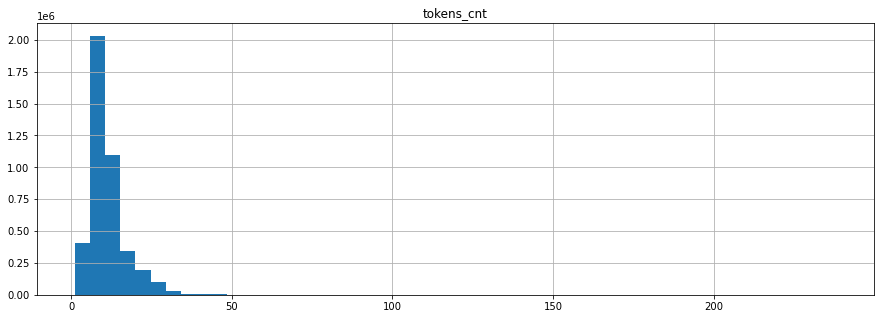

In [23]:
# We believe that questions with low token amounts are usually conveying little information, 
# and perhaps are hurtful distinguishing between good clusters of topics. So let's look at token count distribution:

bins = 50
display(documents.hist('tokens_cnt', bins = bins, figsize = (15,5)))

In [24]:
# Now looking at individual bin sizes:
display(documents.tokens_cnt.value_counts(bins=bins).sort_index())

(0.762, 5.74]        409775
(5.74, 10.48]       2030962
(10.48, 15.22]      1093050
(15.22, 19.96]       340214
(19.96, 24.7]        192987
(24.7, 29.44]        102683
(29.44, 34.18]        30155
(34.18, 38.92]         9810
(38.92, 43.66]         5986
(43.66, 48.4]          2784
(48.4, 53.14]          1956
(53.14, 57.88]         1174
(57.88, 62.62]          763
(62.62, 67.36]          265
(67.36, 72.1]            75
(72.1, 76.84]            26
(76.84, 81.58]           21
(81.58, 86.32]           20
(86.32, 91.06]           11
(91.06, 95.8]             7
(95.8, 100.54]            6
(100.54, 105.28]          6
(105.28, 110.02]          4
(110.02, 114.76]          5
(114.76, 119.5]           1
(119.5, 124.24]           4
(124.24, 128.98]          4
(128.98, 133.72]          0
(133.72, 138.46]          1
(138.46, 143.2]           0
(143.2, 147.94]           0
(147.94, 152.68]          1
(152.68, 157.42]          6
(157.42, 162.16]          1
(162.16, 166.9]           0
(166.9, 171.64]     

Looking at this distribution, we believe it would make sense to crop off the left tail of questions (the ones with < 10 tokens) since they are likely to convey little information and be both unrepresentative of how questions would look like on our app as well as be harder to categorize for our LDA.

Let's see how much of a percentage these tokens represent:

In [25]:
print("% of dataset:", documents.tokens_cnt[documents.tokens_cnt < 10].count()/documents.tokens_cnt.count(), "\n")
print("Amount of questions to drop:", documents.tokens_cnt[documents.tokens_cnt < 10].count(), "\n")
print("Amount of questions remaining:", documents.tokens_cnt.count() - documents.tokens_cnt[documents.tokens_cnt < 10].count())

% of dataset: 0.4814635365049369 

Amount of questions to drop: 2033117 

Amount of questions remaining: 2189668


Although ~48.1% of the dataset is being dropped, we think we can retain a satisfactory amount of data for this proof of concept, as we think ~2.2 million documents should be quite enough to build a dictionary and a functioning topic model.

In [26]:
# Dropping the questions with <10 tokens
documents = documents[~(documents.tokens_cnt < 10)]

In [27]:
# resetting the DataFrame index as well as the index column
documents = documents.reset_index(drop=1)

In [28]:
# Counting the remaining rows
documents.count()

question      2189668
tokens        2189668
tokens_cnt    2189668
dtype: int64

## Data Pre-processing Functions

#### Now we will make functions that perform the following steps

+ **All stopwords are removed**. Words that have 3 or fewer characters are removed as well, even if not in the gensim list of stopwords.

+ **Lemmatization**: words in third person are changed to first person and verbs in past and future tenses are changed into present.

+ **Stemmization**: words are reduced to their root form.

In [29]:
#Loading gensim and nltk libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Guillermo
[nltk_data]     Germade\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Write a function to perform lemmatize and stemmization preprocessing steps on the data set.

In [30]:
def lemmatize_stemming(text):    
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [31]:
# Checking that the preprocessing is working correctly on a random sample.
# Feel free to play with the sample_index value

sample_index = 250
doc_sample = documents.question[sample_index]

print('original document: ')    
print(doc_sample)

print('\n\n tokenized, lemmatized and stemmized document: ')
print(preprocess(doc_sample))

original document: 
How much weight will I lose by not eating for a week?


 tokenized, lemmatized and stemmized document: 
['weight', 'lose', 'eat', 'week']


#### It worked!

#### Preprocess the questions, saving the results as ‘processed_docs’

In [32]:
processed_docs = documents['question'].apply(preprocess)
processed_docs[:10]

0     [step, step, guid, invest, share, market, india]
1                  [increas, speed, internet, connect]
2                                 [mental, lone, solv]
3    [dissolv, water, quik, sugar, salt, methan, ca...
4                    [astrolog, capricorn, moon, rise]
5    [law, chang, status, student, visa, green, car...
6    [trump, presid, mean, current, intern, master,...
7                         [girl, want, friend, reject]
8    [quora, user, post, question, readili, answer,...
9                    [mean, time, look, clock, number]
Name: question, dtype: object

## Bag of Words on the Data set

#### Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [33]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [34]:
# Looking at the amount of unique tokens
print(dictionary)

Dictionary(63294 unique tokens: ['guid', 'india', 'invest', 'market', 'share']...)


In [35]:
# Looking at some of the token unique integer IDs. Feel free to play around with number_samples to see more

number_samples = 20
dict(list(dictionary.token2id.items())[:number_samples])

{'guid': 0,
 'india': 1,
 'invest': 2,
 'market': 3,
 'share': 4,
 'step': 5,
 'connect': 6,
 'increas': 7,
 'internet': 8,
 'speed': 9,
 'lone': 10,
 'mental': 11,
 'solv': 12,
 'carbon': 13,
 'dissolv': 14,
 'methan': 15,
 'oxid': 16,
 'quik': 17,
 'salt': 18,
 'sugar': 19}

### Gensim filter_extremes

#### Filter out tokens that appear in
+ less than 10 documents (insufficient/unreliable datapoints) or
+ more than 50% of documents (probably bad for categorizing, as they're found across many topics).


In [36]:
dictionary.filter_extremes(no_below=10, no_above=0.5)

In [37]:
print(dictionary)

Dictionary(23920 unique tokens: ['guid', 'india', 'invest', 'market', 'share']...)


### Gensim doc2bow

+ For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [38]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

Here's an example of an original document (question), first in unedited, then in preprocessed and finally in doc2bow format:

In [39]:
example = 1000000

print("Original document:", documents.question[example], "\n")
print("Preprocessed document:", processed_docs[example], "\n")
print("doc2bow:", bow_corpus[example], "\n")

Original document: How do I check whether a international life number is still active? 

Preprocessed document: ['check', 'intern', 'life', 'number', 'activ'] 

doc2bow: [(36, 1), (54, 1), (223, 1), (301, 1), (379, 1)] 



In [40]:
bow_doc_sample = bow_corpus[example]
for i in range(len(bow_doc_sample)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_sample[i][0], 
                                              dictionary[bow_doc_sample[i][0]],
                                              bow_doc_sample[i][1]))

Word 36 ("intern") appears 1 time.
Word 54 ("number") appears 1 time.
Word 223 ("life") appears 1 time.
Word 301 ("activ") appears 1 time.
Word 379 ("check") appears 1 time.


## TF-IDF

+ Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [41]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [54]:
# Importing pprint to have "prettier" prints of the outputs ;-) .
from pprint import pprint

In [55]:
# Displaying the tfidf format for the example document

print("Original document: \n", documents.question[example], "\n")

print("Preprocessed document: \n", processed_docs[example], "\n")

print("BOW_format:")
pprint(bow_corpus[example])

print("\n","tfidf:")
pprint(corpus_tfidf[example])

Original document: 
 How do I check whether a international life number is still active? 

Preprocessed document: 
 ['check', 'intern', 'life', 'number', 'activ'] 

BOW_format:
[(36, 1), (54, 1), (223, 1), (301, 1), (379, 1)]

 tfidf:
[(36, 0.4714079503349798),
 (54, 0.381966088830432),
 (223, 0.34226822348174524),
 (301, 0.5079994972919573),
 (379, 0.5066215799690383)]


## Running LDA using Bag of Words

We train our lda model using gensim.models.LdaMulticore and save it to ‘bow_lda_bow’

Used args:
+ num_topics: Allows us to set the amount of topic clusters
+ workers: Allows us to expliscitly set the amount of CPU cores to parallelize the processing task
+ passes: Number of times the model iterates over the documents
+ random_state: 

In [56]:
import time
import math

In [57]:
start = time.time()

lda_model_bow = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=3, random_state = 0)

end = time.time()

In [58]:
# We look at LDA BOW Model training time:
print("Total time:", math.floor((end-start)/60), "minutes and", round((end-start)%60, 2), "seconds")

Total time: 5 minutes and 46.26 seconds


For each topic, we will explore the words occuring in that topic and its relative weight.

In [59]:
for idx, topic in lda_model_bow.print_topics(-1): # the -1 instructs the display of "all" the topic clusters, in this case 5
    print('Topic: {} \nWords: {}'.format(idx, topic), "\n")

Topic: 0 
Words: 0.014*"phone" + 0.014*"number" + 0.014*"account" + 0.013*"mean" + 0.010*"world" + 0.009*"facebook" + 0.008*"differ" + 0.008*"word" + 0.008*"data" + 0.007*"instagram" 

Topic: 1 
Words: 0.028*"like" + 0.028*"peopl" + 0.018*"know" + 0.018*"life" + 0.018*"thing" + 0.016*"quora" + 0.015*"question" + 0.015*"girl" + 0.014*"best" + 0.013*"feel" 

Topic: 2 
Words: 0.015*"differ" + 0.015*"best" + 0.012*"money" + 0.011*"movi" + 0.011*"like" + 0.010*"onlin" + 0.009*"game" + 0.009*"compani" + 0.008*"free" + 0.008*"play" 

Topic: 3 
Words: 0.042*"india" + 0.022*"learn" + 0.019*"best" + 0.018*"indian" + 0.010*"program" + 0.010*"book" + 0.009*"languag" + 0.009*"state" + 0.008*"countri" + 0.008*"servic" 

Topic: 4 
Words: 0.025*"best" + 0.020*"engin" + 0.015*"year" + 0.013*"good" + 0.013*"time" + 0.012*"studi" + 0.011*"univers" + 0.011*"student" + 0.010*"prepar" + 0.009*"english" 



## Running LDA using TF-IDF

In [ ]:
start1 = time.time()

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=3, random_state=0)

end1 = time.time()

In [ ]:
# We look at LDA TF-IDF Model training time:
print("Total time:", math.floor((end1-start1)/60), "minutes and", round((end1-start1)%60, 2), "seconds")

In [ ]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic), "\n")

# Evaluating Results of the LDA Topic Clusters

## Results of LDA on BOW representation:

In [ ]:
sample = 1000006
print("Original document:", documents.question[sample], "\n")

for index, score in lda_model_bow[bow_corpus[sample]]:
    print("\nTopic: {} \nScore: {} \nKey Tokens: {}".format(index, score, lda_model_bow.print_topic(index, 12)))

In [ ]:
sample = 1000006
print("Original document:", documents.question[sample], "\n")

for index, score in lda_model_tfidf[bow_corpus[sample]]:
    print("\nTopic: {} \nScore: {} \nKey Tokens: {}".format(index, score, lda_model_tfidf.print_topic(index, 12)))

In [ ]:
pd.DataFrame(lda_model_tfidf.get_topics().transpose())

In [ ]:
documents